In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import cv2
import tensorflow as tf
from tensorflow import keras
import pathlib
from sklearn.model_selection import train_test_split

In [2]:
dataset_url = "http://download.tensorflow.org/example_images/flower_photos.tgz"
data_dir = keras.utils.get_file('flower_photos', origin = dataset_url, cache_dir = '.', untar = True)

228813984/228813984 ━━━━━━━━━━━━━━━━━━━━ 11s 0us/step


In [3]:
data_dir = pathlib.Path(data_dir)
data_dir

PosixPath('datasets/flower_photos')

In [4]:
len(list(data_dir.glob('*/*/*.jpg')))

3670

In [5]:
roses = list(data_dir.glob('*/roses/*'))

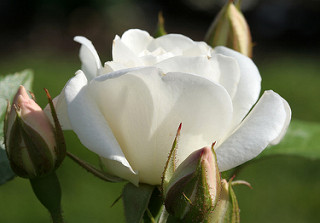

In [6]:
PIL.Image.open(str(roses[2]))

In [7]:
image_dict = {
    'roses': list(data_dir.glob('*/roses/*')),
    'daisy': list(data_dir.glob('*/daisy/*')),
    'dandelion': list(data_dir.glob('*/dandelion/*')),
    'sunflowers': list(data_dir.glob('*/sunflowers/*')),
    'tulips': list(data_dir.glob('*/tulips/*'))
}

In [8]:
flower_label_dict = {
    'roses': 0,
    'daisy': 1,
    'dandelion': 2,
    'sunflowers': 3,
    'tulips': 4
}

In [9]:
img = cv2.imread(image_dict['roses'][0])

In [10]:
cv2.resize(img, (180, 180)).shape

(180, 180, 3)

In [11]:
X, y = [], []
for flower_name, images in image_dict.items():
  for image in images:
    img = cv2.imread(image)
    resized_img = cv2.resize(img, (180, 180))
    X.append(resized_img)
    y.append(flower_label_dict[flower_name])

In [12]:
X = np.array(X)
y = np.array(y)

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [14]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [15]:
model = keras.Sequential([
    keras.layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,  (3, 3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,  (3, 3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5)
])

model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [16]:
model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.3356 - loss: 1.6308
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.5798 - loss: 1.0386
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.6810 - loss: 0.8314
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 27ms/step - accuracy: 0.7569 - loss: 0.6564
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.8524 - loss: 0.4215
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9007 - loss: 0.2873
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9620 - loss: 0.1383
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9612 - loss: 0.1189
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy: 0.9905 - loss: 0.0443
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 21ms/step - accuracy: 0.9834 - loss: 0.0583
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 2s 19ms/step - accuracy: 0.9852 - loss: 0.0534
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 19ms/step - accuracy:

In [19]:
model.evaluate(X_test, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 2s 29ms/step - accuracy: 0.5616 - loss: 676.5312


[732.898193359375, 0.5435729622840881]

In [36]:
aug = keras.Sequential([
    keras.layers.RandomZoom(0.6)
])

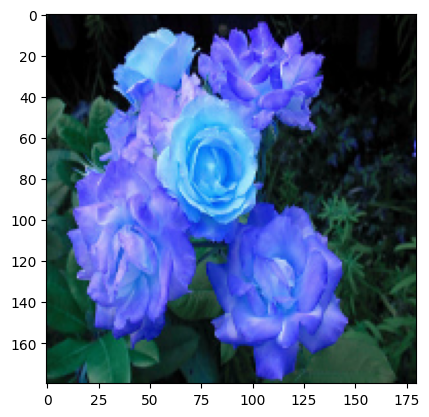

In [29]:
plt.imshow(X[0])

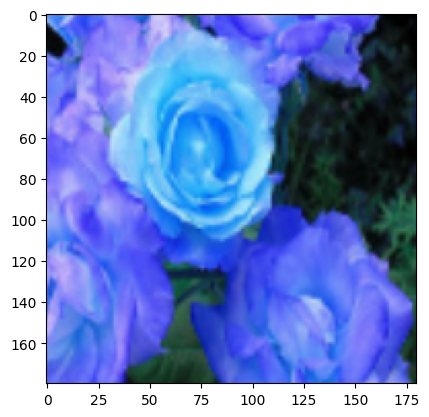

In [37]:
plt.imshow(aug(X)[0].numpy().astype('uint8'))

In [39]:
model = keras.Sequential([
    keras.layers.RandomZoom(0.7),
    keras.layers.RandomContrast(0.6),
    keras.layers.RandomRotation(0.6),
    keras.layers.Conv2D(16, (3, 3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(32,  (3, 3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Conv2D(64,  (3, 3), padding = 'same', activation = 'relu'),
    keras.layers.MaxPool2D(),
    keras.layers.Dropout(0.2),
    keras.layers.Flatten(),
    keras.layers.Dense(128, activation = 'relu'),
    keras.layers.Dense(5)
])

model.compile(optimizer = 'adam', loss = keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics = ['accuracy'])

In [40]:
model.fit(X_train_scaled, y_train, epochs = 30)

Epoch 1/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.2923 - loss: 1.8505
Epoch 2/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.4284 - loss: 1.3013
Epoch 3/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 34ms/step - accuracy: 0.5401 - loss: 1.1120
Epoch 4/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.5911 - loss: 1.0204
Epoch 5/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.5824 - loss: 1.0411
Epoch 6/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 32ms/step - accuracy: 0.6368 - loss: 0.9144
Epoch 7/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 32ms/step - accuracy: 0.6398 - loss: 0.9377
Epoch 8/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6551 - loss: 0.9039
Epoch 9/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - accuracy: 0.6596 - loss: 0.8942
Epoch 10/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6488 - loss: 0.8962
Epoch 11/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy: 0.6816 - loss: 0.8399
Epoch 12/30
86/86 ━━━━━━━━━━━━━━━━━━━━ 3s 31ms/step - accuracy

In [41]:
model.evaluate(X_test_scaled, y_test)

29/29 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - accuracy: 0.7284 - loss: 0.7215


[0.7381411790847778, 0.7135076522827148]